In [518]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [447]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [448]:
data = pd.read_csv('/content/Credit_Card_Limit_Data.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Avg_Utilization_Ratio,Pay_on_time,Random_numbers
0,708082083,no,45,female,3,secondary,married/living with partner,<30k,blue,36,3544.0,0.469,no,0.686812
1,708084558,yes,46,male,3,third level,divorced,71 – 110k,blue,38,8258.0,0.214,no,0.561857
2,708085458,no,34,female,2,primary,single,<30k,blue,24,1438.3,0.000,yes,0.041056
3,708098133,no,32,female,0,third level,married/living with partner,<30k,blue,19,2834.0,0.500,no,0.013894
4,708099183,no,37,female,2,secondary,single,<30k,blue,36,5723.0,0.327,no,0.739904


In [449]:
data.shape

(7298, 14)

In [450]:
data.isnull().sum() # checking for null values

CLIENTNUM                0
Attrition_Flag           0
Customer_Age             0
Gender                   0
Dependent_count          0
Education_Level          0
Marital_Status           0
Income_Category          0
Card_Category            0
Months_on_book           0
Credit_Limit             0
Avg_Utilization_Ratio    0
Pay_on_time              0
Random_numbers           0
dtype: int64

In [451]:
data = data.replace(r'^#NULL!$', np.NaN, regex=True)
data.shape

(7298, 14)

In [452]:
data.duplicated().sum() # checking for any duplicate rows in the dataset

0

In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7298 entries, 0 to 7297
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CLIENTNUM              7298 non-null   int64  
 1   Attrition_Flag         7298 non-null   object 
 2   Customer_Age           7298 non-null   int64  
 3   Gender                 7298 non-null   object 
 4   Dependent_count        7298 non-null   int64  
 5   Education_Level        7298 non-null   object 
 6   Marital_Status         7097 non-null   object 
 7   Income_Category        7281 non-null   object 
 8   Card_Category          7298 non-null   object 
 9   Months_on_book         7298 non-null   int64  
 10  Credit_Limit           7298 non-null   float64
 11  Avg_Utilization_Ratio  7298 non-null   float64
 12  Pay_on_time            7298 non-null   object 
 13  Random_numbers         7298 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 798.3+ 

In [454]:
data = data.dropna()
data['Marital_Status'].isnull().sum() # drop null values from Marital_Status column

0

In [455]:
data.shape

(7081, 14)

In [456]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Credit_Limit,Avg_Utilization_Ratio,Random_numbers
count,7.081000e+03,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,7.390919e+08,46.347691,2.337805,35.981359,8492.773831,0.282313,0.500023
std,3.685244e+07,8.041225,1.291649,8.002609,9126.072520,0.278731,0.290098
min,7.080821e+08,26.000000,0.000000,13.000000,1438.300000,0.000000,0.000140
25%,7.130105e+08,41.000000,1.000000,31.000000,2498.000000,0.026000,0.247352
50%,7.178438e+08,46.000000,2.000000,36.000000,4287.000000,0.186000,0.505239
75%,7.732370e+08,52.000000,3.000000,40.000000,10729.000000,0.515000,0.750421
max,8.282989e+08,73.000000,5.000000,56.000000,34516.000000,0.999000,0.999881


### EXPLORATORY DATA ANALYSIS

PART 1 : UNIVARATE ANALYSIS

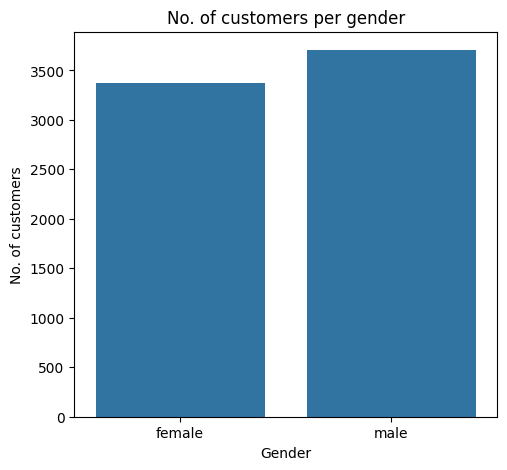

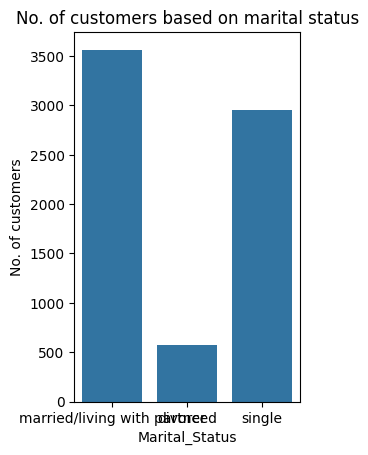

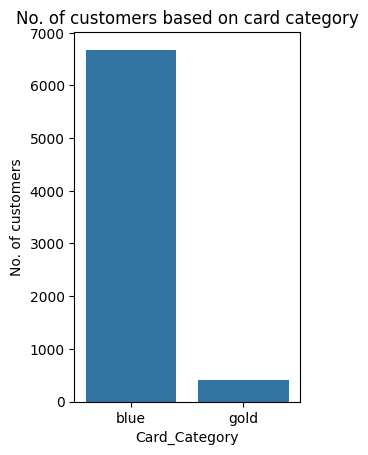

In [457]:
plt.figure(figsize = (12,5))

# No. of customers per gender
ax1 = plt.subplot(1,2,1)
sns.countplot(data = data, x = 'Gender', ax = ax1)
plt.title('No. of customers per gender')
plt.xlabel('Gender')
plt.ylabel('No. of customers')
plt.show()

# No. of customers based on marital status
ax2 = plt.subplot(1,2,2)
sns.countplot(data = data, x = 'Marital_Status', ax = ax2)
plt.ylabel('No. of customers')
plt.title('No. of customers based on marital status')
plt.show()

# No. of customers based on card category
ax3 = plt.subplot(1,2,2)
sns.countplot(data = data, x = 'Card_Category', ax = ax3)
plt.ylabel('No. of customers')
plt.title('No. of customers based on card category')
plt.show()

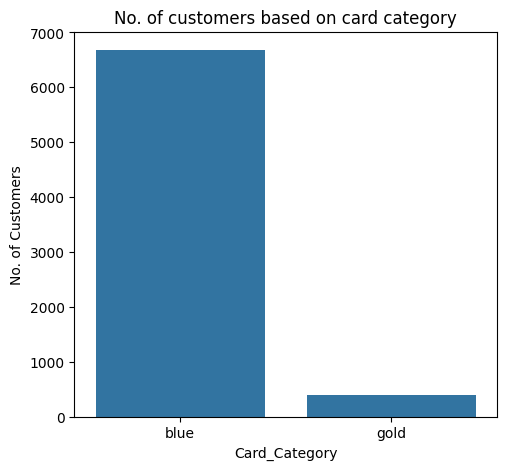

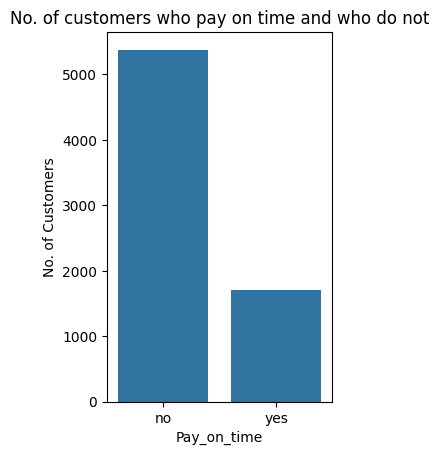

In [458]:
# No. of customers based on card category
plt.figure(figsize = (12, 5))
ax1 = plt.subplot(1,2,1)
sns.countplot(data = data, x = 'Card_Category', ax = ax1)
plt.ylabel('No. of Customers')
plt.title('No. of customers based on card category')
plt.show()

# No. of customers who pay on time and who do not
ax2 = plt.subplot(1,2,2)
sns.countplot(data = data, x = 'Pay_on_time', ax = ax2)
plt.ylabel('No. of Customers')
plt.title('No. of customers who pay on time and who do not')
plt.show()

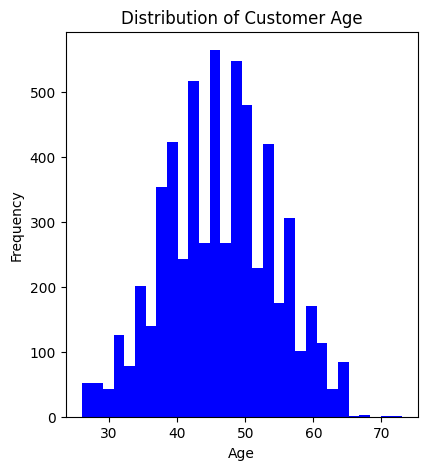

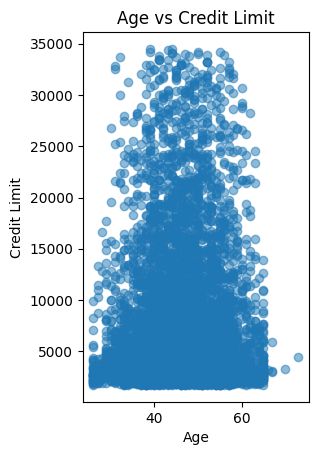

In [519]:
plt.figure(figsize = (10,5))

ax1 = plt.subplot(1,2,1)
plt.hist(data['Customer_Age'], bins = 30, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')
plt.show()

ax2 = plt.subplot(1,2,2)
plt.scatter(data['Customer_Age'], data['Credit_Limit'], alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.title('Age vs Credit Limit')
plt.show()

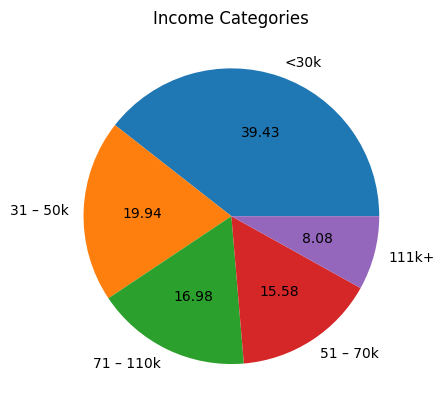

In [460]:
# plotting income categories
income_labels = data['Income_Category'].value_counts().index
plt.pie(data['Income_Category'].value_counts(), labels = income_labels, autopct = "%0.2f")
plt.title('Income Categories')
plt.show()

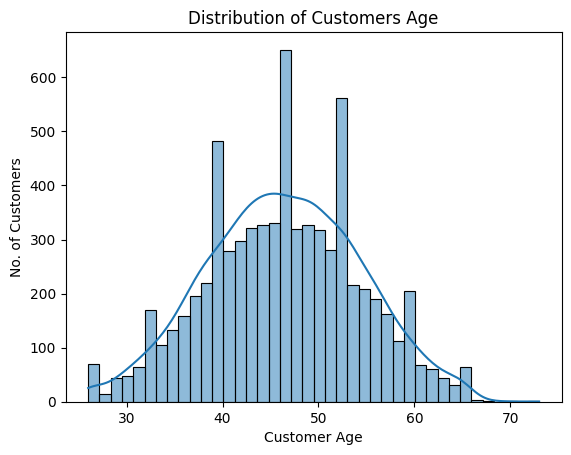

In [461]:
# Distribution of Customer age
sns.histplot(data = data, x = 'Customer_Age', bins = 40, kde = True)
plt.title('Distribution of Customers Age')
plt.xlabel('Customer Age')
plt.ylabel('No. of Customers')
plt.show()

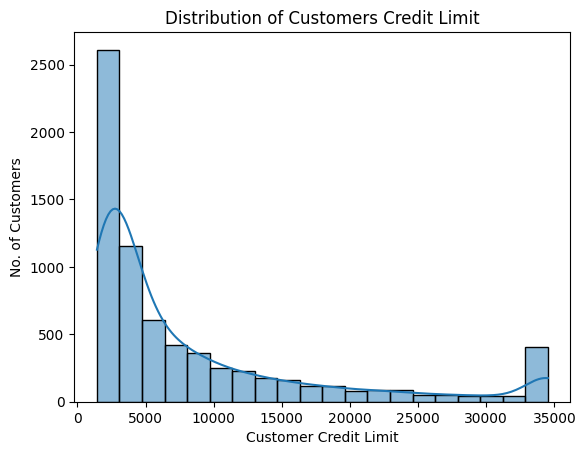

In [462]:
# distribution of customer credit limit
sns.histplot(data = data, x = 'Credit_Limit', bins = 20, kde = True)
plt.title('Distribution of Customers Credit Limit')
plt.xlabel('Customer Credit Limit')
plt.ylabel('No. of Customers')
plt.show()

PART 2 : MULTIVARIATE ANALYSIS

In [463]:
data = data.drop(columns = ['CLIENTNUM', 'Attrition_Flag', 'Random_numbers'])

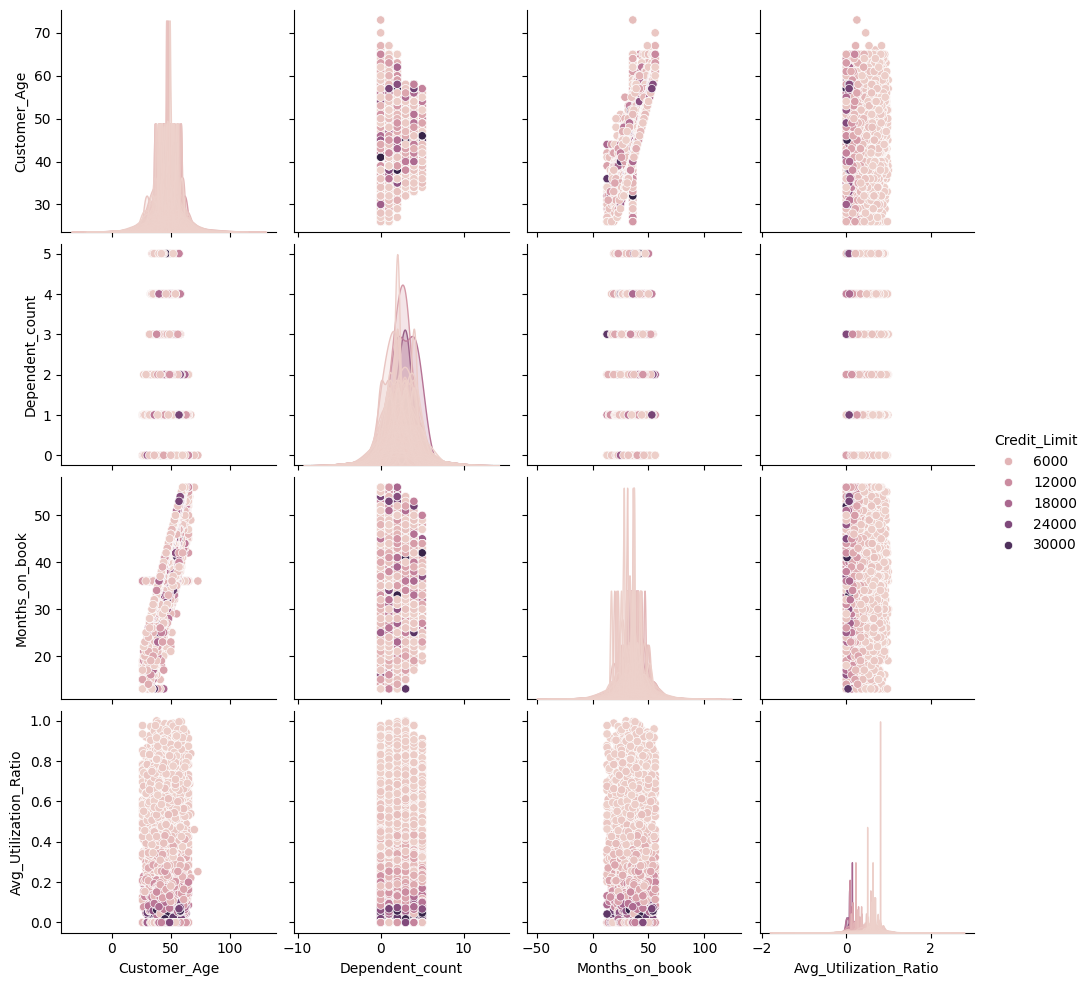

In [517]:
sns.pairplot(data, hue = 'Credit_Limit')

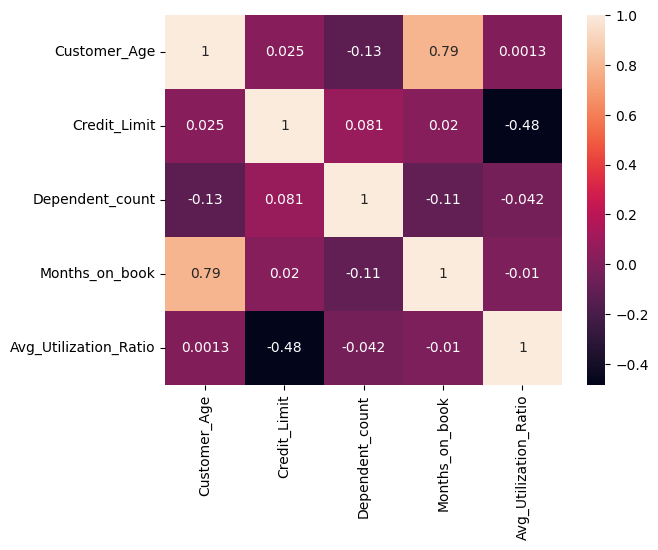

In [465]:
# correlation matrix for numerical features

df_corr = data[['Customer_Age', 'Credit_Limit', 'Dependent_count', 'Months_on_book', 'Avg_Utilization_Ratio']]
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

# Multicollinearity present in 2 independent variables - Customer_Age and Months_on_book
# It can also be seen that a negative moderate correlation exists between Avg_utilization ratio and Credit Limit of "-0.48"
# which shows that with the increase in avg_utilization ratio(measure of how often the credit card is used)
# the Credit Limit for that customer decreases moderatly and vice versa.

Text(0.5, 1.0, 'Box Plot of Credit Limit as per Gender')

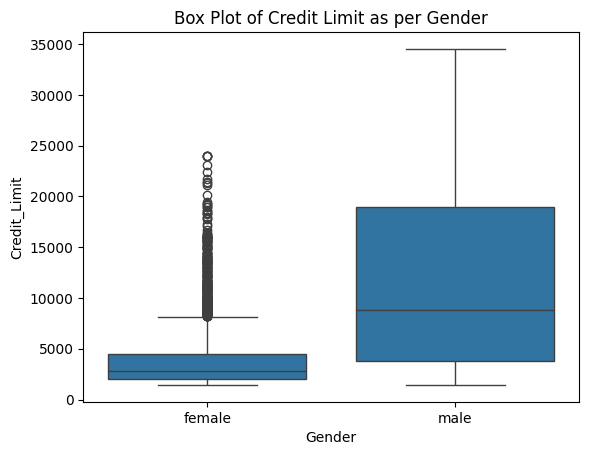

In [466]:
sns.boxplot(x = 'Gender', y = 'Credit_Limit', data = data)
plt.title('Box Plot of Credit Limit as per Gender')

# From the boxplot below, it can be seen that males customers have much higher median credit limit.

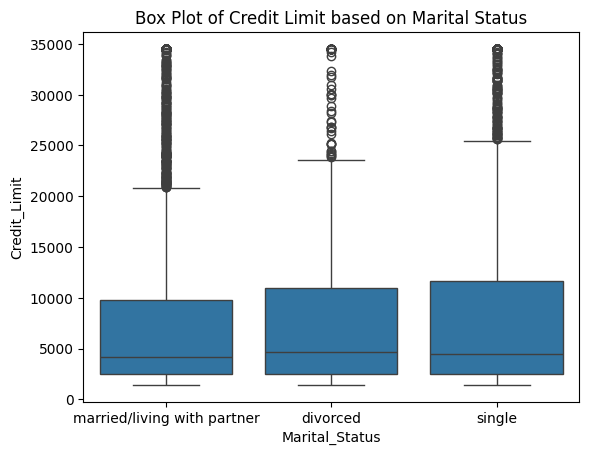

In [467]:
sns.boxplot(x = 'Marital_Status', y = 'Credit_Limit', data = data)
plt.title('Box Plot of Credit Limit based on Marital Status')
plt.show()

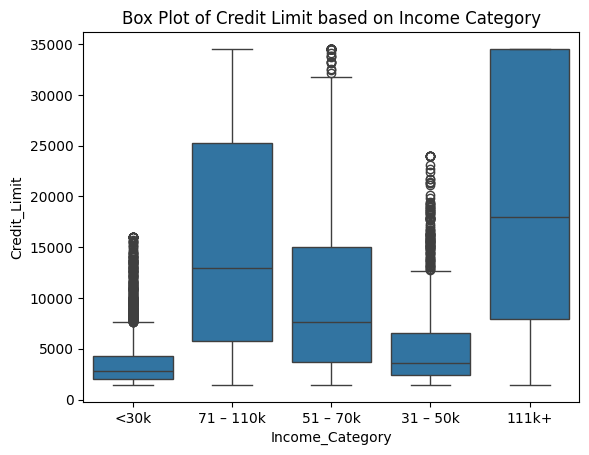

In [468]:
sns.boxplot(x = 'Income_Category', y = 'Credit_Limit', data = data)
plt.title('Box Plot of Credit Limit based on Income Category')
plt.show()

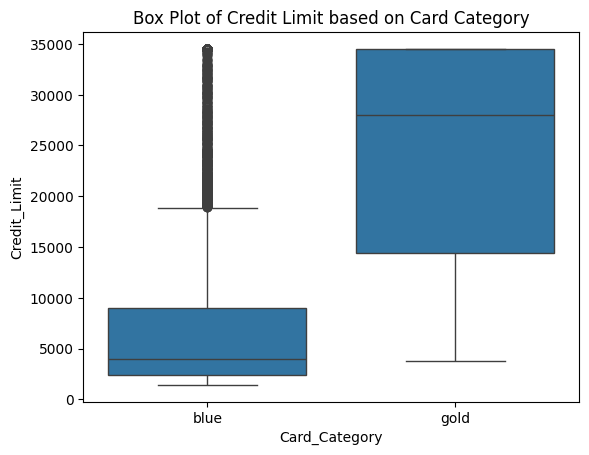

In [469]:
sns.boxplot(x = 'Card_Category', y = 'Credit_Limit', data = data)
plt.title('Box Plot of Credit Limit based on Card Category')
plt.show()

## FEATURE ENGINEERING

In [470]:
# handling outliers

print(data['Credit_Limit'].skew())

1.7035723761391386


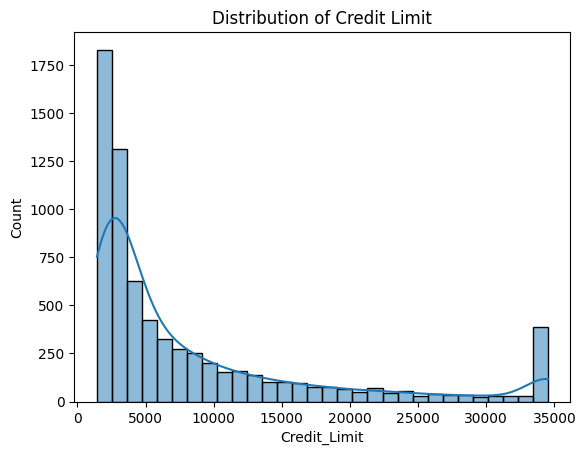

In [471]:
sns.histplot(data = data, x = 'Credit_Limit', bins = 30, kde = True)
plt.title('Distribution of Credit Limit')
plt.show()

In [472]:
upper = data['Credit_Limit'].quantile(0.1)
lower = data['Credit_Limit'].quantile(0.99)
#IQR = Q3-Q1

#lower_bound = Q1-1.5*IQR
#upper_bound = Q3+1.5*IQR

index = data[(data['Credit_Limit'] >= lower) | (data['Credit_Limit'] <= upper)].index
index.shape

(1082,)

In [473]:
data.drop(index, inplace = True)
data.head(5)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Avg_Utilization_Ratio,Pay_on_time
0,45,female,3,secondary,married/living with partner,<30k,blue,36,3544.0,0.469,no
1,46,male,3,third level,divorced,71 – 110k,blue,38,8258.0,0.214,no
3,32,female,0,third level,married/living with partner,<30k,blue,19,2834.0,0.500,no
4,37,female,2,secondary,single,<30k,blue,36,5723.0,0.327,no
5,55,female,3,third level,single,<30k,blue,36,2679.0,0.850,no


In [474]:
data.Credit_Limit.describe()

count     5999.000000
mean      7705.670445
std       7064.954690
min       1719.000000
25%       2783.500000
50%       4631.000000
75%       9959.000000
max      34496.000000
Name: Credit_Limit, dtype: float64

In [475]:
print(data.Credit_Limit.skew())

1.6840894217153446


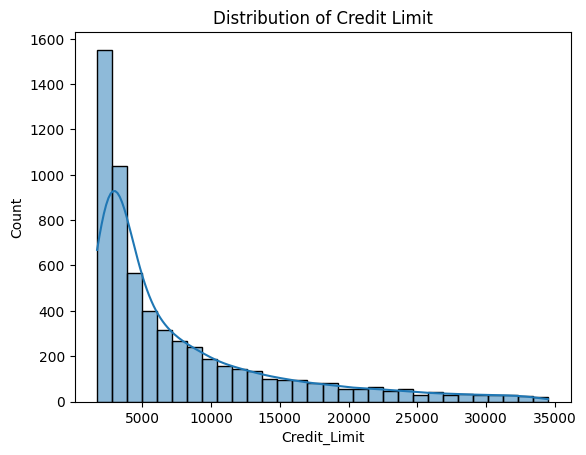

In [476]:
sns.histplot(data = data, x = 'Credit_Limit', bins = 30, kde = True)
plt.title('Distribution of Credit Limit')
plt.show()

In [477]:
credit_data = data
credit_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Avg_Utilization_Ratio,Pay_on_time
0,45,female,3,secondary,married/living with partner,<30k,blue,36,3544.0,0.469,no
1,46,male,3,third level,divorced,71 – 110k,blue,38,8258.0,0.214,no
3,32,female,0,third level,married/living with partner,<30k,blue,19,2834.0,0.500,no
4,37,female,2,secondary,single,<30k,blue,36,5723.0,0.327,no
5,55,female,3,third level,single,<30k,blue,36,2679.0,0.850,no


In [478]:
Credit_Data_Final_Categorical=credit_data[["Gender","Education_Level","Marital_Status","Income_Category","Card_Category","Pay_on_time"]]
Credit_Data_Final_Numerical=credit_data[["Customer_Age","Dependent_count","Months_on_book","Credit_Limit","Avg_Utilization_Ratio"]]

#Encoding Categorical variables

Credit_Data_Final_Categorical_encoded= pd.get_dummies(Credit_Data_Final_Categorical,drop_first=True)

Credit_Data_Final_Categorical_encoded = Credit_Data_Final_Categorical_encoded.astype(int)

#Final Dataframe with encoded values
Credit_Data_Final=pd.concat([Credit_Data_Final_Numerical,Credit_Data_Final_Categorical_encoded], axis = 1)

Credit_Data_Final_Categorical_encoded.head()

,Gender_male,Education_Level_secondary,Education_Level_third level,Marital_Status_married/living with partner,Marital_Status_single,Income_Category_31 – 50k,Income_Category_51 – 70k,Income_Category_71 – 110k,Income_Category_<30k,Card_Category_gold,Pay_on_time_yes
0,0,1,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,1,0,0
5,0,0,1,0,1,0,0,0,1,0,0


In [479]:
Credit_Data_Final.head()

,Customer_Age,Dependent_count,Months_on_book,Credit_Limit,Avg_Utilization_Ratio,Gender_male,Education_Level_secondary,Education_Level_third level,Marital_Status_married/living with partner,Marital_Status_single,Income_Category_31 – 50k,Income_Category_51 – 70k,Income_Category_71 – 110k,Income_Category_<30k,Card_Category_gold,Pay_on_time_yes
0,45,3,36,3544.0,0.469,0,1,0,1,0,0,0,0,1,0,0
1,46,3,38,8258.0,0.214,1,0,1,0,0,0,0,1,0,0,0
3,32,0,19,2834.0,0.500,0,0,1,1,0,0,0,0,1,0,0
4,37,2,36,5723.0,0.327,0,1,0,0,1,0,0,0,1,0,0
5,55,3,36,2679.0,0.850,0,0,1,0,1,0,0,0,1,0,0


SPLITTING DATA INTO TRAIN AND TEST SET

In [480]:
X = Credit_Data_Final.loc[:, Credit_Data_Final.columns != 'Credit_Limit']
y = np.log10(Credit_Data_Final)['Credit_Limit']

In [481]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Avg_Utilization_Ratio,Gender_male,Education_Level_secondary,Education_Level_third level,Marital_Status_married/living with partner,Marital_Status_single,Income_Category_31 – 50k,Income_Category_51 – 70k,Income_Category_71 – 110k,Income_Category_<30k,Card_Category_gold,Pay_on_time_yes
0,45,3,36,0.469,0,1,0,1,0,0,0,0,1,0,0
1,46,3,38,0.214,1,0,1,0,0,0,0,1,0,0,0
3,32,0,19,0.500,0,0,1,1,0,0,0,0,1,0,0
4,37,2,36,0.327,0,1,0,0,1,0,0,0,1,0,0
5,55,3,36,0.850,0,0,1,0,1,0,0,0,1,0,0


In [482]:
y.head()

0    3.549494
1    3.916875
3    3.452400
4    3.757624
5    3.427973
Name: Credit_Limit, dtype: float64

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

## MODEL BUILDING

In [485]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [486]:
y_pred = lin_reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6543160785366084
0.042403270497692463


In [487]:
!pip install statsmodels

In [488]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [489]:
x_c = sm.add_constant(X)
model = sm.OLS(y, x_c).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     779.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:21:28   Log-Likelihood:                 1119.9
No. Observations:                5999   AIC:                            -2208.
Df Residuals:                    5983   BIC:                            -2101.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [490]:
X = sm.add_constant(X)
def backward_elimination(X, y, significance_level=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            max_p_feature = p_values.idxmax()
            X = X.drop(columns=[max_p_feature])
        else:
            break
    return X

# Apply backward elimination
X_significant = backward_elimination(X, y)

# Fit the final model with significant variables
final_model = sm.OLS(y, X_significant).fit()

# Print the summary of the final model
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1299.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:21:28   Log-Likelihood:                 1117.2
No. Observations:                5999   AIC:                            -2214.
Df Residuals:                    5989   BIC:                            -2147.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [491]:
X_significant_sklearn = X_significant.drop(columns=['const'])

# Train the linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_significant, y)

# Make predictions
y_pred = model_sklearn.predict(X_significant)

# Compute metrics
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

# Print metrics
print(f'R²: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

R²: 0.6611801102379135
RMSE: 0.20085449963542032
MAE: 0.1595116896975426


In [492]:
X_significant.head()

,const,Dependent_count,Avg_Utilization_Ratio,Gender_male,Marital_Status_married/living with partner,Income_Category_31 – 50k,Income_Category_51 – 70k,Income_Category_<30k,Card_Category_gold,Pay_on_time_yes
0,1.0,3,0.469,0,1,0,0,1,0,0
1,1.0,3,0.214,1,0,0,0,0,0,0
3,1.0,0,0.500,0,1,0,0,1,0,0
4,1.0,2,0.327,0,0,0,0,1,0,0
5,1.0,3,0.850,0,0,0,0,1,0,0


In [493]:
lin_reg = LinearRegression()
ridge = ridge_regression(X_train, y_train, alpha = 1.0)
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 24)
svr = SVR(kernel = 'rbf')
knn = KNeighborsRegressor(n_neighbors = 10)

In [499]:
regs = {
    'Lin_Reg' : lin_reg,
    'DT_Reg' : dt_reg,
    'RF_Reg' : rf_reg,
    'SVR' : svr,
    'KNN' : knn
}

In [500]:
def train_regressor(reg, X_train, y_train, X_test, y_test):
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)

  score = r2_score(y_test,y_pred)
  #print("R^2 = ",score)
  #r2.append(score)
  #print("Mean squared error = ",mean_squared_error(y_test,y_pred))
  mse = mean_squared_error(y_test,y_pred)
  #MSE.append(mean_squared_error(y_test,y_pred))
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  #print("Root Mean squared error = ",np.sqrt(mean_squared_error(y_test,y_pred)))
  #RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

  return score, mse, rmse

  '''if reg == lin_reg or reg == rf_reg:
    print("Linear Regression Coefficients:", reg.coef_)
    print("Linear Regression Intercept:", reg.intercept_)'''

In [501]:
def print_graph(reg, X_train, y_train, X_test, y_test):
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)

  plt.scatter(y_test,y_pred);
  plt.xlabel('Actual');
  plt.ylabel('Predicted');
  sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "black"}, line_kws={"color": "red"});
  plt.show()

In [502]:
train_regressor(lin_reg, X_train, y_train, X_test, y_test)

(0.6543160785366084, 0.042403270497692463, 0.20592054413703473)

In [503]:
import sklearn
import sklearn.metrics
r2_scores = []
mse_scores = []
rmse_scores = []

for name, reg in regs.items():
  current_score, current_mse, current_rmse = train_regressor(reg, X_train, y_train, X_test, y_test)
  r2_scores.append(current_score)
  mse_scores.append(current_mse)
  rmse_scores.append(current_rmse)

  print("For", name)
  print('R2 Score - ', current_score)
  print('MSE - ', current_mse)
  print('RMSE - ', current_rmse)

For Lin_Reg
R2 Score -  0.6543160785366084
MSE -  0.042403270497692463
RMSE -  0.20592054413703473
For DT_Reg
R2 Score -  0.4808136606746065
MSE -  0.06368592062923831
RMSE -  0.25236069549206414
For RF_Reg
R2 Score -  0.7216056586142912
MSE -  0.03414920344814272
RMSE -  0.1847950309076051
For SVR
R2 Score -  0.47419110877129755
MSE -  0.06449827504408127
RMSE -  0.25396510595765176
For KNN
R2 Score -  0.3427210715998381
MSE -  0.08062502900163684
RMSE -  0.283945468359044


For -  Lin_Reg


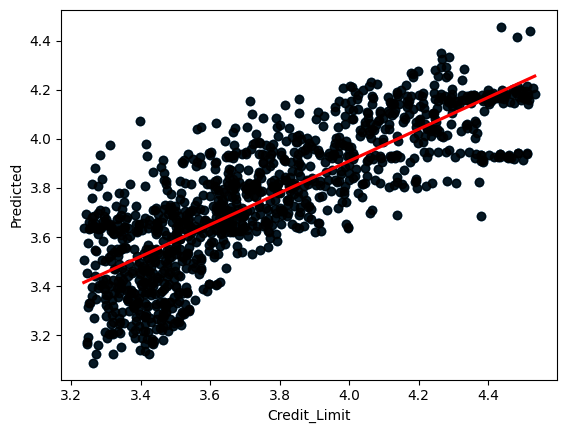

For -  DT_Reg


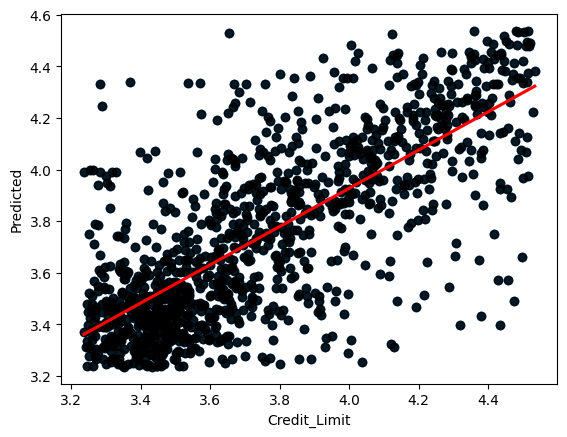

For -  RF_Reg


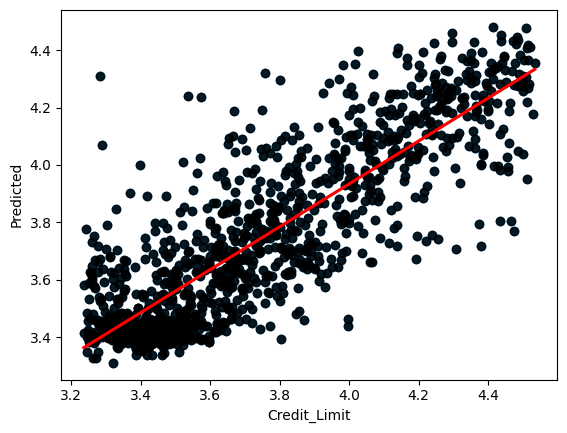

For -  SVR


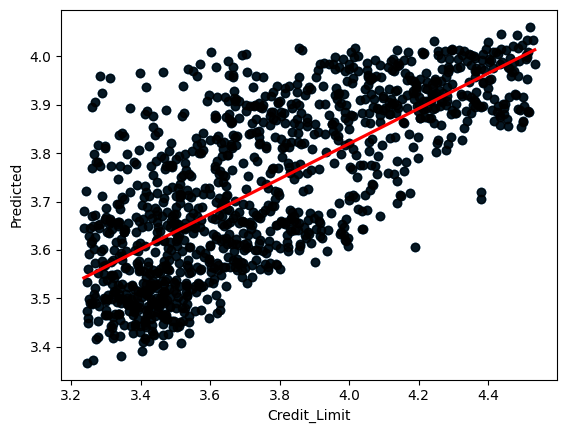

For -  KNN


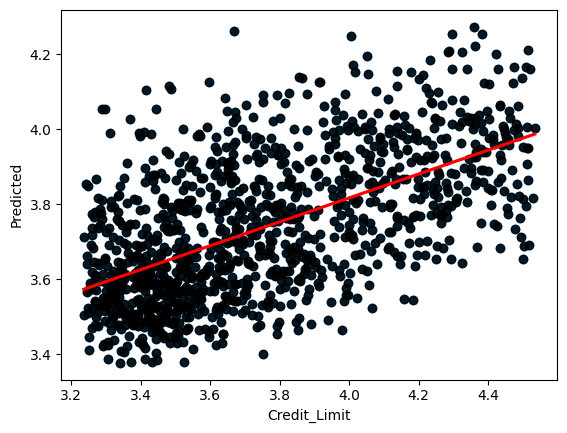

In [505]:
for name, reg in regs.items():
  print('For - ', name)
  print_graph(reg, X_train, y_train, X_test, y_test)

In [506]:
performance_df = pd.DataFrame({'Algorithm' : regs.keys(), 'R2 Scores' : r2_scores, 'MSE' : mse_scores, 'RMSE' : rmse_scores}).sort_values('R2 Scores', ascending = False)

In [507]:
performance_df

,Algorithm,R2 Scores,MSE,RMSE
2,RF_Reg,0.721606,0.034149,0.184795
0,Lin_Reg,0.654316,0.042403,0.205921
1,DT_Reg,0.480814,0.063686,0.252361
3,SVR,0.474191,0.064498,0.253965
4,KNN,0.342721,0.080625,0.283945


In [520]:
# hyper-parameter tuning for the Random Forest Regressor

In [509]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [510]:
'''rf = RandomForestRegressor(random_state = 24)

# initializing GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# fit GridSearchCV
grid_search.fit(X_train, y_train)

# best parameters
best_params = grid_search.best_params_
print("Best Parameters found by GridSearchCV: ")
print(best_params)'''

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters found by GridSearchCV:
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [511]:
best_rf = RandomForestRegressor(random_state = 24, **best_params)

# Fit the model
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Compute metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.7479600189229918
Mean Squared Error: 0.03091644947962519
Root Mean Squared Error: 0.17583074099720217


In [ ]:
# Grid Search CV results

'''Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters found by GridSearchCV:
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}'''

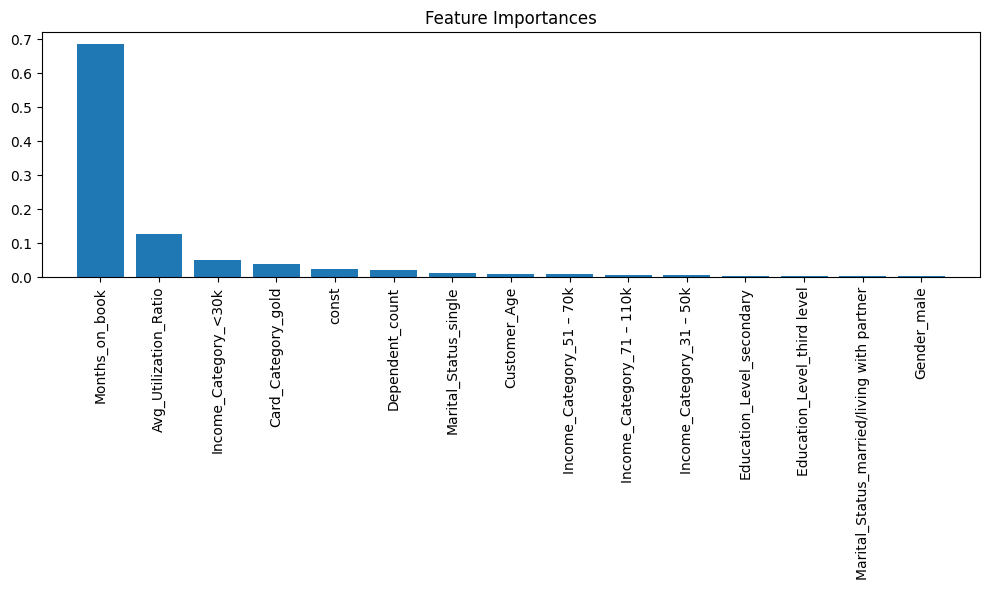

In [513]:
# Get feature importances from the model
feature_importances = best_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), feature_importances[indices], align="center")
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.xlim([-1, len(indices)])  # Adjust x-axis limits based on the number of features
plt.tight_layout()
plt.show()


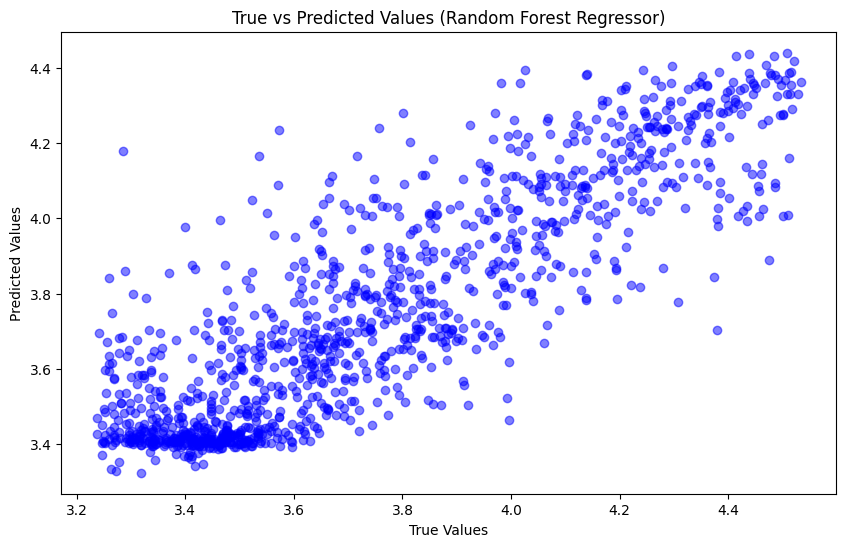

Conclusion:
Random Forest Regression with tuned hyperparameters achieved an R² score of 0.75.
Feature importances:
Months_on_book: 0.6865
Avg_Utilization_Ratio: 0.1262
Income_Category_<30k: 0.0493
Card_Category_gold: 0.0375
const: 0.0241
Dependent_count: 0.0205
Marital_Status_single: 0.0114
Customer_Age: 0.0098
Income_Category_51 – 70k: 0.0094
Income_Category_71 – 110k: 0.0073
Income_Category_31 – 50k: 0.0071
Education_Level_secondary: 0.0030
Education_Level_third level: 0.0028
Marital_Status_married/living with partner: 0.0026
Gender_male: 0.0024


In [514]:
# Example of printing conclusions and visualizing predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, )
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Random Forest Regressor)')
plt.show()

print("Conclusion:")
print(f"Random Forest Regression with tuned hyperparameters achieved an R² score of {r2:.2f}.")
print("Feature importances:")
for i in range(len(indices)):
    print(f"{X.columns[indices[i]]}: {feature_importances[indices[i]]:.4f}")